 ## **HOMEWORK 2**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

**II. Programming and critical analysis** [7v]

Consider the heart-disease.csv dataset available at the course webpage’s homework tab.
Using sklearn, apply a 5-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section. 
<br> <br>
**1)** Compare the performance of a with and a naïve Bayes with Gaussian 𝑘𝑁𝑁𝑘=5 assumption (consider all remaining parameters as default): <br> <br>
**a.** [1.0v] Plot two boxplots with the fold accuracies for each classifier. Is there one more stable than the other regarding performance? Why do you think that is the case? Explain.

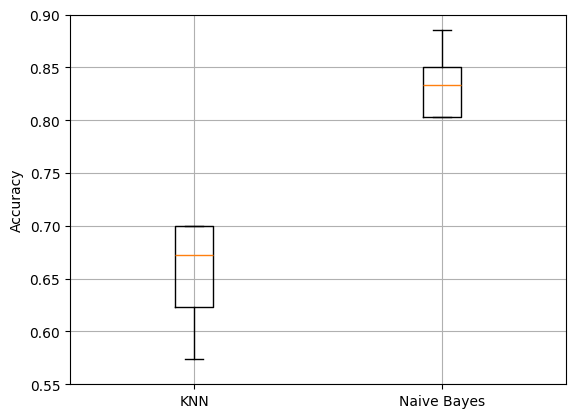

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('heart-disease.csv')
x = data.drop('target', axis=1)
y = data['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()

knn_scores = cross_val_score(knn, x, y, cv=skf, scoring='accuracy')
gnb_scores = cross_val_score(naive_bayes, x, y, cv=skf, scoring='accuracy')

plt.boxplot([knn_scores, gnb_scores])
plt.xticks([1, 2], ['KNN', 'Naive Bayes'])
plt.ylabel('Accuracy')
plt.ylim(0.55, 0.9)
plt.grid(True)
plt.show()

A estabilidade de um modelo pode ser analisada ao se compararem as amplitudes das accuracies. O modelo mais estável teria uma menor amplitude, o que indicaria que o seu desempenho não varia muito com as mudanças nos folds. Tendo isto em conta, podemos dizer que Naive Bayes é mais estável, o que se pode dever ao facto de que assume fortemente a independência das features e é menos sensível a variações locais nos dados, depende mais das propriedades estatísticas do dataset, ao contrário do KNN que é mais sensível a padrões locais, levando a uma maior variação na performance.

**b.** [1.0v] Report the accuracy of both models, this time scaling the data with a Min-Max scaler before training the models. Explain the impact that this preprocessing step has on the performance of each model, providing an explanation for the results.

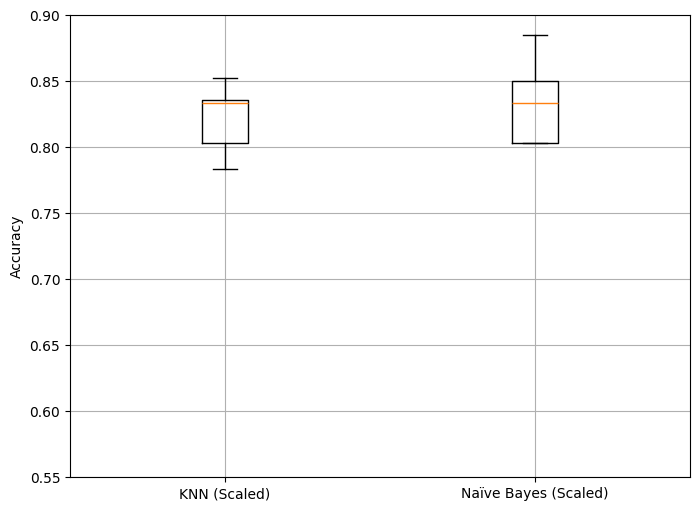

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

knn_scores_scaled = cross_val_score(knn, X_scaled, y, cv=skf, scoring='accuracy')
gnb_scores_scaled = cross_val_score(naive_bayes, X_scaled, y, cv=skf, scoring='accuracy')

plt.figure(figsize=(8, 6))
plt.boxplot([knn_scores_scaled, gnb_scores_scaled], labels=['KNN (Scaled)', 'Naïve Bayes (Scaled)'])
plt.ylabel('Accuracy')
plt.ylim(0.55, 0.9)
plt.grid(True)
plt.show()


KNN depende fortemente em funções de distância (por exemplo, distância euclideana) e features com intervalos maiores dominam os cálculos dessas distâncias. Logo, realizar o Min-Max scaling garante uma comparação mais justa/equilibrada entre as features, pois estas passam a contribuir igualmente para o cálculo das distâncias, resultando numa maior accuracy e um desempenho mais consistente ao longo dos folds.

No caso de Naive Bayes, o seu desempenho não se altera muito com a utilização de scaling, uma vez que não depende das distâncias entre data points mas sim da distribuição de cada feature.


**c.** [1.0v] Using scipy, test the hypothesis “the model is statistically superior to 𝑘𝑁𝑁 naïve Bayes regarding accuracy”, asserting whether it is true.

In [26]:
import numpy as np
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(knn_scores_scaled, gnb_scores_scaled)

print(f"p-value: {p_value:.4f}")

alpha = 0.1

# Hypothesis testing decision
if p_value < alpha:
    print("Reject the null hypothesis: KNN is statistically superior to Naïve Bayes in terms of accuracy.")
else:
    print("Fail to reject the null hypothesis: No evidence that KNN is statistically superior to Naïve Bayes.")
    
    

kNN Mean Accuracy: 0.8151
Naive Bayes Mean Accuracy: 0.8350
p-value: 0.2064
Fail to reject the null hypothesis: No evidence that KNN is statistically superior to Naïve Bayes.
Statistics=-1.506, p=0.206


**2)** Using a 80-20 train-test split, vary the number of neighbors of a classifier using 𝑘𝑁𝑁.Additionally, for each , train one classifier using uniform weights 𝑘 = {1, 5, 10, 20, 30} 𝑘 and distance weights. <br> <br>
**a.** [1.0v] Plot the train and test accuracy for each model.

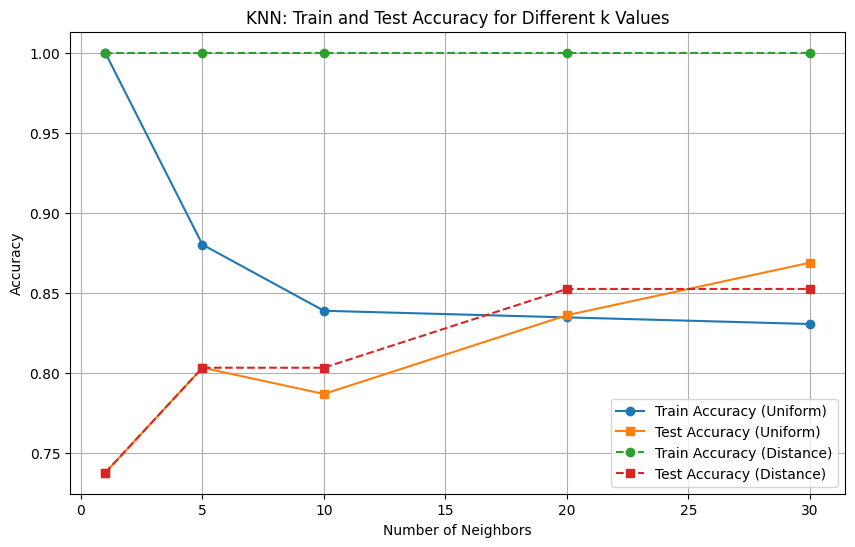

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

k_values = [1, 5, 10, 20, 30]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

train_accuracies_uniform = []
test_accuracies_uniform = []
train_accuracies_distance = []
test_accuracies_distance = []

for k in k_values:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    
    train_accuracies_uniform.append(accuracy_score(y_train, knn_uniform.predict(X_train)))
    test_accuracies_uniform.append(accuracy_score(y_test, knn_uniform.predict(X_test)))
    train_accuracies_distance.append(accuracy_score(y_train, knn_distance.predict(X_train)))
    test_accuracies_distance.append(accuracy_score(y_test, knn_distance.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies_uniform, label='Train Accuracy (Uniform)', marker='o')
plt.plot(k_values, test_accuracies_uniform, label='Test Accuracy (Uniform)', marker='s')
plt.plot(k_values, train_accuracies_distance, label='Train Accuracy (Distance)', marker='o', linestyle='--')
plt.plot(k_values, test_accuracies_distance, label='Test Accuracy (Distance)', marker='s', linestyle='--')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Train and Test Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()


**b.** [1.5v] Explain the impact of increasing the neighbors on the generalization ability of the models.

Ao usarmos pesos uniformes, todos os vizinhos contribuem de maneira igual para a previsão. Enquanto para valores pequenos de k o modelo é mais sensível a "ruído" (grande impacto dos outliers na previsão), valores mais altos de k levam a previsões mais estáveis (os pesos uniformes reduzem a sensibilidade do modelo a data points individuais para k maior).

No caso de pesos baseados na distância, os vizinhos mais próximos têm mais influência na previsão, o que resulta numa melhor generalização para valores de k pequenos. No entanto, para valores de k mais elevados, a diferença entre o uso de pesos uniformes e pesos baseados na distância torna-se mínima uma vez que o modelo utiliza a média dos vizinhos e a distância entre estes torna-se menos crítica.

**3)** [1.5v] Considering the unique properties of the heart-disease.csv dataset, identify two possible difficulties of the naïve Bayes model used in the previous exercises when learning from the given dataset.

Naïve Bayes assumes that all features are independent of each other. However, in real-world medical data like the heart-disease dataset, many features (such as blood pressure, cholesterol levels, and age) are likely to be correlated and ignoring these dependencies can lead to inaccurate probability estimates, reducing the model's overall predictive performance.

Naïve Bayes (specifically the Gaussian variant) assumes that continuous features follow a normal (Gaussian) distribution. If the distribution of the continuous features in the heart-disease dataset (e.g., age, cholesterol, or blood pressure) significantly deviates from the normal distribution, the model may misestimate probabilities, which can negatively affect its predictive performance.

Naive Bayes assume que as features são independentes umas das outra. No entanto, features referentes a dados médicos podem esta correlacionadas e ignorar estas dependências pode causar previsões imprecisas.

Naive Bayes assume também que as features contínuas seguem uma distribuição normal. Se a disribuição das features do dataset se desviar muito da distribuição normal, o modelo pode fazer previsões imprecisas.